# PA 2: Classification - Decision Tree

## --> Student Details [3 Points]

Notes: When submitting, fill your name and ID in this cell.  [1 point]

First Student Name and ID: Naga Sri Sampath Inagalla 1002070731 <br>
Second Student Name and ID: Sai Subhash Yalamadala 1002031729 <br>
Third Student Name and ID: Akhil Ade 1002031729

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.

#### <b>Note: Please consult the TA before using libraries other than the ones mentioned above</b>

### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

## Programming Assignment Submission Instructions [2 Points]

### Each file should be submitted separately, do not compress them

For Decision Tree:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report/Explanation in markdown cells and code in code cells of Notebook preferred)

# Begin your code from here


#   1. Loading dataset and importing libraries

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Importing the libraries 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.linear_model import Ridge,Lasso
import scipy.stats as stats
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [16]:
df = pd.read_csv('dataset_DT.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34.0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no


# 2. DATA PREPROCESSING 

In [17]:
print("DataFrame shape:",df.shape)

DataFrame shape: (18423, 17)


In [18]:
print("Info Of Data Set:")
df.info()

Info Of Data Set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [19]:
#Checking NULL Values
df.isna().sum()

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [20]:
#Checking mode of education and Month since they have NULL Values
mode_month=df['month'].mode()[0]
mode_education=df['education'].mode()[0]
print("Mode of Month:",mode_month)
print("Mode of Education:",mode_education)


Mode of Month: may
Mode of Education: secondary


In [21]:
#Filling with NUll Vallues with modes of Month and education
df['month']=df['month'].fillna(mode_month)
df['education']=df['education'].fillna(mode_education)

In [22]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [23]:
unknown_cols=[col for col in df.columns if 'unknown' in df[col].values]
print("Unknown contained columns:",unknown_cols)

Unknown contained columns: ['job', 'education', 'contact', 'poutcome']


C:\Users\harish\AppData\Local\Temp\ipykernel_20984\535704496.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  unknown_cols=[col for col in df.columns if 'unknown' in df[col].values]


# the above columns have unknown values

In [24]:
### Finding Modes of unknown contained columns to be replaced
mode_dict={uc:df[uc].mode()[0] for uc in unknown_cols}
mode_dict

{'job': 'management',
 'education': 'secondary',
 'contact': 'cellular',
 'poutcome': 'unknown'}

In [25]:
#Checkig number of unknown values in columns
for uc in unknown_cols:
    print(uc,':',(df[uc]=='unknown').sum())

job : 112
education : 753
contact : 4313
poutcome : 13259


# We can see that except poutcome job,education,contact has less no of unknown values, so we can apply forward fill for poutcome and remaining ones can be filled with mode values

In [26]:
#replacing unknow with mode values 
for uc in unknown_cols:
    df[uc]=df[uc].replace('unknown',mode_dict[uc])

In [27]:
#Checkig number of unknown values in columns
for uc in unknown_cols:
    print(uc,':',(df[uc]=='unknown').sum())

job : 0
education : 0
contact : 0
poutcome : 13259


# Using Forwarding Fill

In [28]:
df['poutcome']=df['poutcome'].replace('unknown',method='ffill')
print('count of unknowns in poutcome:',(df['poutcome'] == 'unknown').sum())

count of unknowns in poutcome: 1


Dropping Unknown columns after forward fill

In [29]:
df.drop(df[df['poutcome'] == 'unknown'].index, inplace=True)
print('count of unknowns in poutcome:',(df['poutcome'] == 'unknown').sum())

count of unknowns in poutcome: 0


# Dropping Day Column

In [30]:
df.drop('day', axis =1, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,apr,202.0,2.0,-1.0,0.0,other,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,apr,263.0,1.0,-1.0,0.0,other,no
5,54.0,retired,married,secondary,no,1004.0,yes,no,cellular,apr,479.0,1.0,307.0,1.0,failure,no


# 3.Visualizations

secondary    10077
tertiary      5789
primary       2556
Name: education, dtype: int64


<AxesSubplot:xlabel='education', ylabel='count'>

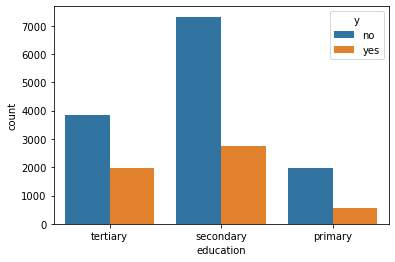

In [31]:
# Analysing educational Status
print(df['education'].value_counts())
sns.countplot(data=df, x='education', hue = "y")

# In the above graph on X-axis we take values of education attributes and on Y- axis we take values of term deposit. From the graph we infer that the group of  people who completed secondary education  likely to subscribe term deposit.

management       4194
blue-collar      3721
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
Name: job, dtype: int64


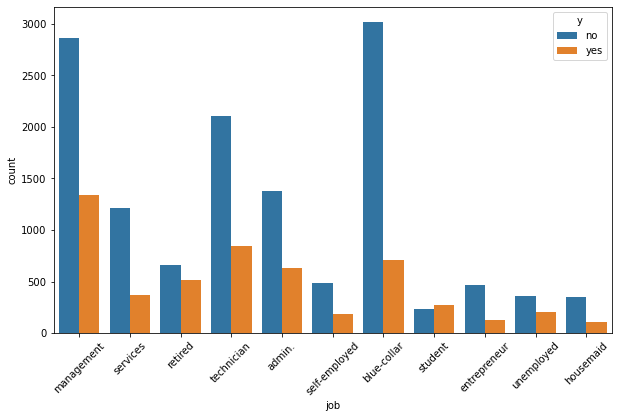

In [32]:
# Analysing job Status
print(df['job'].value_counts())
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.countplot(data=df, x='job', hue = "y")
plt.show()

# In the above graph we take values of job attributes on X-axis and on Y-axis we take values of term deposit. From the above graph we can say the groups management ,technician,blue-collar likey to subscribe to term deposit.

# 4. Determining influential attributes

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
1,49.0,management,divorced,tertiary,no,20727.0,no,no,cellular,apr,285.0,3.0,132.0,2.0,failure,no
2,32.0,services,single,tertiary,no,1743.0,yes,no,cellular,apr,1156.0,1.0,261.0,3.0,other,no
3,46.0,management,divorced,tertiary,no,10469.0,yes,no,cellular,apr,202.0,2.0,-1.0,0.0,other,no
4,26.0,management,single,tertiary,no,7628.0,no,no,cellular,apr,263.0,1.0,-1.0,0.0,other,no
5,54.0,retired,married,secondary,no,1004.0,yes,no,cellular,apr,479.0,1.0,307.0,1.0,failure,no


In [34]:
#Label Encoding
lbl_encoder=preprocessing.LabelEncoder()
for i in df.columns:
    if isinstance (df[i][1],str):
        df[i]=lbl_encoder.fit_transform(df[i])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
1,49.0,4,0,2,0,20727.0,0,0,0,0,285.0,3.0,132.0,2.0,0,0
2,32.0,7,2,2,0,1743.0,1,0,0,0,1156.0,1.0,261.0,3.0,1,0
3,46.0,4,0,2,0,10469.0,1,0,0,0,202.0,2.0,-1.0,0.0,1,0
4,26.0,4,2,2,0,7628.0,0,0,0,0,263.0,1.0,-1.0,0.0,1,0
5,54.0,5,1,1,0,1004.0,1,0,0,0,479.0,1.0,307.0,1.0,0,0


# Chi-Squared Test

In [35]:
cv_lst= ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for cv in cv_lst:
    chi_sq,p,dof,expected= stats.chi2_contingency(pd.crosstab(df[cv], df['y']))
    print(cv,'\nChi-Squared Static:',chi_sq,'\n P-Value:',p)

job 
Chi-Squared Static: 537.3553457763642 
 P-Value: 4.549608076828463e-109
marital 
Chi-Squared Static: 117.60070816636939 
 P-Value: 2.9062347256822544e-26
education 
Chi-Squared Static: 129.5359579751715 
 P-Value: 7.440876933027331e-29
default 
Chi-Squared Static: 0.26028629797816794 
 P-Value: 0.6099235324834744
housing 
Chi-Squared Static: 738.826455689161 
 P-Value: 1.0788389226876846e-162
loan 
Chi-Squared Static: 122.76578688823724 
 P-Value: 1.5692104637195714e-28
contact 
Chi-Squared Static: 22.452017972933735 
 P-Value: 2.154590099386366e-06
month 
Chi-Squared Static: 1414.505694098105 
 P-Value: 8.932823729013015e-297
poutcome 
Chi-Squared Static: 1024.4936167109795 
 P-Value: 3.420091763620143e-223


Continuous Variables


In [36]:
continuous_vars=df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

y=df['y']

anova_model=ols('y ~ age + balance + duration + campaign + pdays + previous', data=df).fit()

sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
age,5.275617,1.0,27.956794,1.254704e-07
balance,0.221291,1.0,1.172677,2.788661e-01
duration,254.914732,1.0,1350.855886,1.893253e-285
campaign,11.629059,1.0,61.625245,4.381149e-15
pdays,5.945975,1.0,31.509186,2.013594e-08
previous,18.183948,1.0,96.361214,1.088193e-22
Residual,3475.022646,18415.0,NaN,NaN


Confirming our Hypothesis

In [37]:
X = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
y = df['y']
log_reg_model = sm.Logit(y, X).fit()

# Compute the z-statistics and corresponding p-values for each coefficient
z_stats = log_reg_model.params / log_reg_model.bse
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_stats)))

stats_df=pd.DataFrame(data=zip(list(z_stats),list(p_values)),columns=['Z-Value','P-Value'])
stats_df=stats_df.set_index(X.columns)
stats_df


Optimization terminated successfully.
         Current function value: 0.582864
         Iterations 6


,Z-Value,P-Value
age,-32.692798,0.000000
balance,-0.561585,0.574399
duration,26.403016,0.000000
campaign,-15.139671,0.000000
pdays,1.350854,0.176742
previous,8.523588,0.000000


# 5. Spliting the dataset


In [48]:

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 6. Using Gini and Entropy

In [39]:
def calculate_gini(max_depth,sample_leaf):
    dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=max_depth, min_samples_leaf=sample_leaf,random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy*100

In [40]:
calculate_gini(10,2)

76.7042987407729

In [41]:
#7. Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.
#Gini with multiple max_depths and sample_leaves
depths = [2,4,6,8,10,12,14,16,18]
leaves=[2,4,6,8,14,16]

max_accuracy_gini=0
best_depth = 0
best_leaf = 0

accuracies=[]

for md in depths:
    for sl in leaves:
        acc=calculate_gini(md,sl)
        accuracies.append(acc)

        if acc>max_accuracy_gini:
            max_accuracy_gini=acc
            best_depth=md
            best_leaf=sl


print("Best Accuracy: {:.2f}% with max_depth = {} and min_samples_leaf = {}".format(max_accuracy_gini, best_depth, best_leaf))

Best Accuracy: 77.49% with max_depth = 8 and min_samples_leaf = 6


C:\Users\harish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report - Gini Criterion
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      3244
           1       0.66      0.44      0.53      1362

    accuracy                           0.77      4606
   macro avg       0.73      0.67      0.69      4606
weighted avg       0.75      0.77      0.75      4606



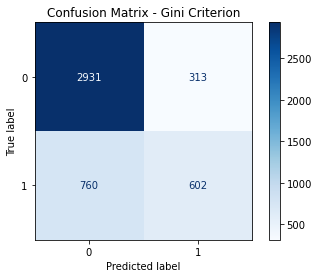

In [42]:
# Plot confusion matrix for gini
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=10, min_samples_leaf=2,random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Gini Criterion')

print("# Confusion matrix shows the number of true positive in top left ,false positive on top right ,false negative on bottom left and true negative on bottom right.")


# Print classification report for gini
print('\nClassification Report - Gini Criterion')
print(classification_report(y_test, y_pred))

Entropy

In [43]:
def calculate_entropy(max_depth,sample_leaf):
    dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth, min_samples_leaf=sample_leaf,random_state=42)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy*100

In [44]:
#Gini with multiple max_depths and sample_leaves
depths = [2,4,6,8,10,12,14,16,18]
leaves=[2,4,6,8,14,16]

max_accuracy_entropy=0
best_depth = 0
best_leaf = 0

accuracies=[]

for md in depths:
    for sl in leaves:
        acc=calculate_entropy(md,sl)
        accuracies.append(acc)

        if acc>max_accuracy_entropy:
            max_accuracy_entropy=acc
            best_depth=md
            best_leaf=sl


print("Best Accuracy: {:.2f}% with max_depth = {} and min_samples_leaf = {}".format(max_accuracy_gini, best_depth, best_leaf))

Best Accuracy: 77.49% with max_depth = 8 and min_samples_leaf = 8


C:\Users\harish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report - Entropy Criterion
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      3244
           1       0.68      0.43      0.53      1362

    accuracy                           0.77      4606
   macro avg       0.73      0.67      0.69      4606
weighted avg       0.76      0.77      0.75      4606



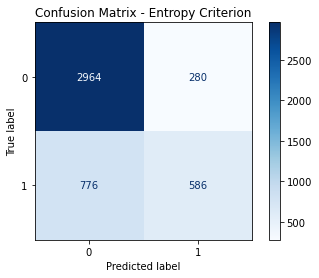

In [45]:
# Plot confusion matrix for entropy
dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, min_samples_leaf=2,random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Entropy Criterion')

# Print classification report for entropy
print('\nClassification Report - Entropy Criterion')
print(classification_report(y_test, y_pred))

# 9.Comparing Results of Gini and Entropy


In [46]:
print('Accuracy with Gini impurity:', max_accuracy_gini,"%")
print('Accuracy with entropy:', max_accuracy_entropy,"%")

Accuracy with Gini impurity: 77.48588797221016 %
Accuracy with entropy: 77.42075553625706 %


# 10. Decision Tree with depth of 5


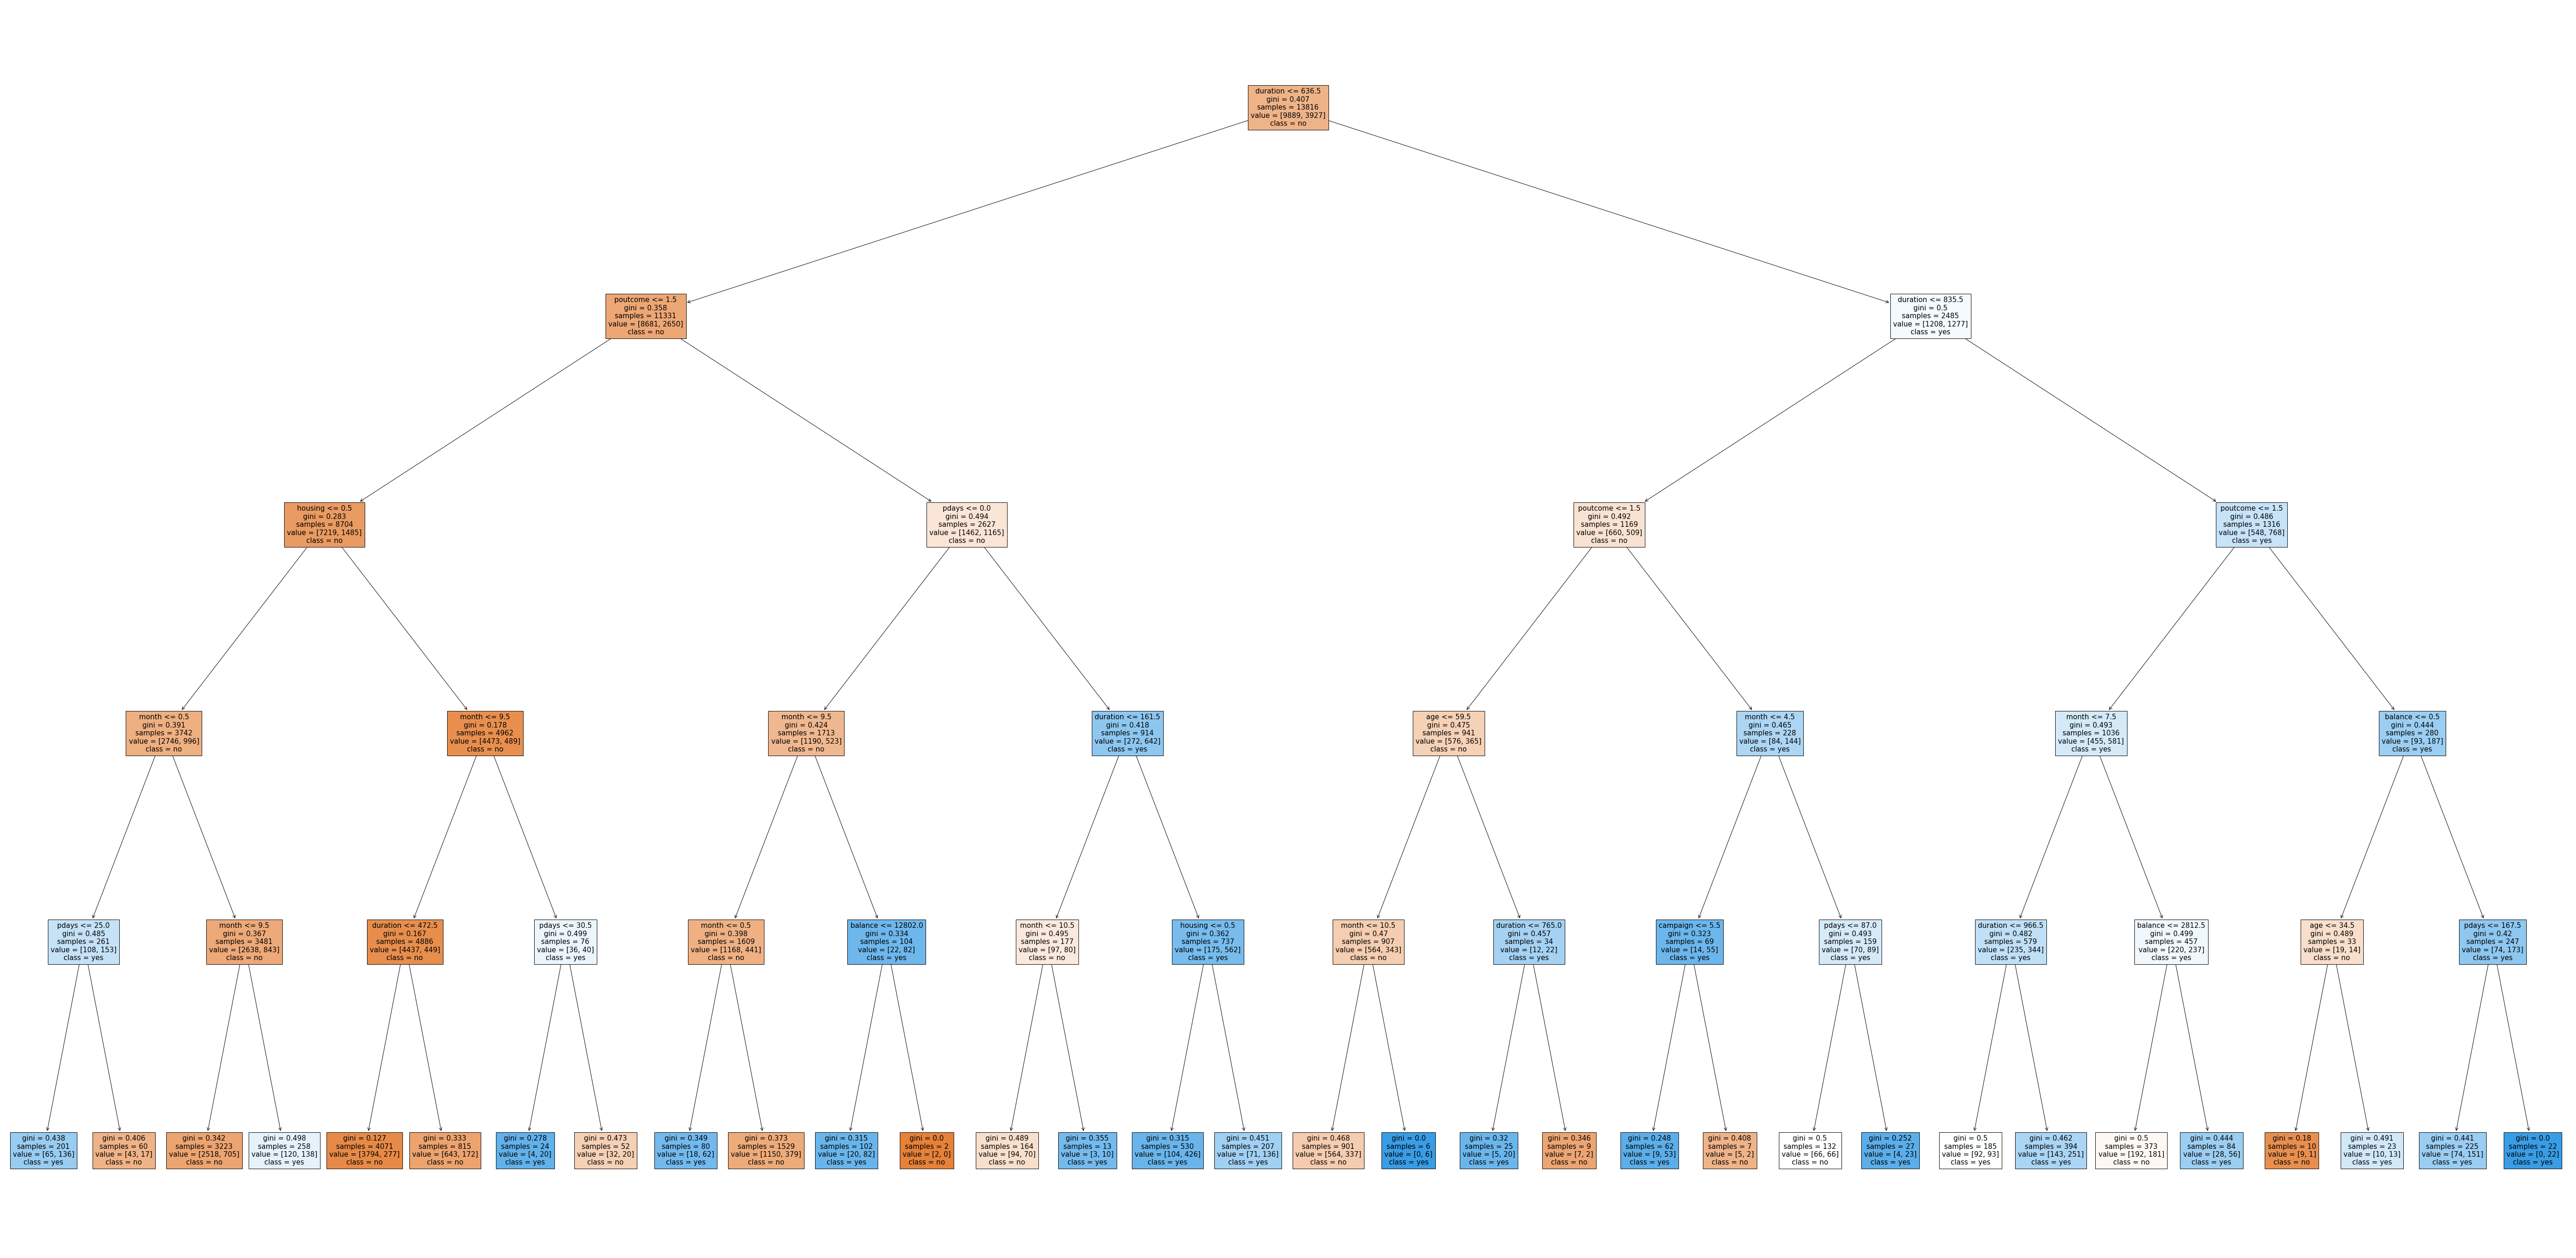

<Figure size 432x288 with 0 Axes>

In [47]:
# Initialize the decision tree classifier
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Train the decision tree classifier
dtc.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.show()
plt.savefig('decision_tree.png')

# 11. Contribution:

In this project, I contributed to the development and implementation of the decision tree classifier model using Python. I also conducted data preprocessing,data visualizatons and other mentioned tasks.
                                                                         

 Naga sri sampath Inagalla